Datasource: https://www.kaggle.com/datasets/santiago123678/biological-data-of-human-ancestors-data-sets/data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



: 

In [5]:
df = pd.read_csv('../data/data.csv')

In [6]:
df.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,Australopithecus Anamensis,4.2- 3.9,Africa,oriental,Kenya,forest-gallery,281.19,132.33,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
1,hominino Sahelanthropus tchadensis,7,Africa,central,Republic of Chad,mixed,94.12,87.49,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
2,Australopithecus Afarensis,3.9 - 2.9,Africa,oriental,Kenya,mixed,311.48,120.44,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,hominino Sahelanthropus tchadensis,7,Africa,central,Republic of Chad,mixed,196.00,88.40,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
4,Homo Heidelbergensis,500-250,Europa,central-europe,Germany,cold forest,1232.46,167.60,small,modern,...,modern,manipulate,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust


In [7]:
df.shape

(720, 28)

In [8]:
df.isna().sum()

Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           720 non-null    object 
 1   Time                     720 non-null    object 
 2   Location                 720 non-null    object 
 3   Zone                     720 non-null    object 
 4   Current_Country          720 non-null    object 
 5   Habitat                  720 non-null    object 
 6   Cranial_Capacity         720 non-null    float64
 7   Height                   720 non-null    float64
 8   Incisor_Size             720 non-null    object 
 9   Jaw_Shape                720 non-null    object 
 10  Torus_Supraorbital       720 non-null    object 
 11  Prognathism              720 non-null    object 
 12  Foramen_Mágnum_Position  720 non-null    object 
 13  Canine Size              720 non-null    object 
 14  Canines_Shape            7

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.nunique()

genus_&_specie              24
time                        24
location                     3
zone                         7
current_country              8
habitat                      9
cranial_capacity           717
height                     685
incisor_size                 5
jaw_shape                    5
torus_supraorbital           5
prognathism                  7
foramen_mágnum_position      4
canine size                  2
canines_shape                2
tooth_enamel                 7
tecno                        3
tecno_type                   6
biped                        4
arms                         3
foots                        2
diet                         5
sexual_dimorphism            3
hip                          4
vertical_front               3
anatomy                      4
migrated                     2
skeleton                     3
dtype: int64

In [13]:
df.columns

Index(['genus_&_specie', 'time', 'location', 'zone', 'current_country',
       'habitat', 'cranial_capacity', 'height', 'incisor_size', 'jaw_shape',
       'torus_supraorbital', 'prognathism', 'foramen_mágnum_position',
       'canine size', 'canines_shape', 'tooth_enamel', 'tecno', 'tecno_type',
       'biped', 'arms', 'foots', 'diet', 'sexual_dimorphism', 'hip',
       'vertical_front', 'anatomy', 'migrated', 'skeleton'],
      dtype='object')

In [14]:
df.rename(columns={'genus_&_specie':'genus_species', 'canine size':'canine_size'},inplace=True)

In [15]:
for column in df.columns:
    if column not in ['cranial_capacity', 'height']:
        print(f"Categories in '{column}' variable:", end=" ")
        print(df[column].unique())
        print('='*100)
        print('\n')

Categories in 'genus_species' variable: ['Australopithecus Anamensis' 'hominino Sahelanthropus tchadensis'
 'Australopithecus Afarensis' 'Homo Heidelbergensis' 'Paranthropus Boisei'
 'Homo Erectus' 'Homo Naledi' 'Homo Georgicus' 'Australopithecus Sediba'
 'Paranthropus Robustus' 'Australopithecus Garhi' 'Homo Sapiens'
 'Homo Rudolfensis' 'Homo Floresiensis' 'Homo Habilis' 'Homo Antecesor'
 'Homo Neanderthalensis\n' 'hominino Ardipithecus ramidus / kabadda'
 'Australopithecus Bahrelghazali' 'Homo Ergaster'
 'Australopithecus Africanus' 'Paranthropus Aethiopicus'
 'hominino Orrorin tugenencin' 'Homo Rodhesiensis']


Categories in 'time' variable: ['4.2- 3.9 ' '7' '3.9 - 2.9 ' '500-250' '2.3-1.2 ' '1.3-1.1 ' '300-225'
 '1.8' '1.9' '1.9-1 ' '2.5' '300-3' '2.8-1.9 ' '100-50' '2.5-1.6 '
 '1ma-800' '230-40' '4' '3.5- 3 ' '1.8-1.4 ' '3.5-2.4 ' '2.6' '6'
 '600-125']


Categories in 'location' variable: ['Africa' 'Europa' 'Asia ']


Categories in 'zone' variable: ['oriental' 'central' 'central-e

In [16]:
import pandas as pd

def replace_values_genus(x):
    if x == 'Homo Neanderthalensis\n':
        return 'Homo Neanderthalensis'
    elif x.strip().lower() == 'hominino sahelanthropus tchadensis':
        return 'Sahelanthropus tchadensis'
    elif x.strip().lower() == 'hominino ardipithecus ramidus / kabadda':
        return 'Ardipithecus ramidus / kabadda'
    elif x.strip().lower() == 'hominino orrorin tugenencin':
        return 'Orrorin tugenencin'
    else:
        return x

def replace_values_tooth(x):
    if x == 'thick-medium':
        return 'medium-thick'
    else:
        return x


df['genus_species'] = df['genus_species'].apply(replace_values_genus)
df['tooth_enamel'] = df['tooth_enamel'].apply(replace_values_tooth)

In [17]:
df['genus_species'].unique()

array(['Australopithecus Anamensis', 'Sahelanthropus tchadensis',
       'Australopithecus Afarensis', 'Homo Heidelbergensis',
       'Paranthropus Boisei', 'Homo Erectus', 'Homo Naledi',
       'Homo Georgicus', 'Australopithecus Sediba',
       'Paranthropus Robustus', 'Australopithecus Garhi', 'Homo Sapiens',
       'Homo Rudolfensis', 'Homo Floresiensis', 'Homo Habilis',
       'Homo Antecesor', 'Homo Neanderthalensis',
       'Ardipithecus ramidus / kabadda', 'Australopithecus Bahrelghazali',
       'Homo Ergaster', 'Australopithecus Africanus',
       'Paranthropus Aethiopicus', 'Orrorin tugenencin',
       'Homo Rodhesiensis'], dtype=object)

In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['cranial_capacity', 'height']

We have 26 categorical features : ['genus_species', 'time', 'location', 'zone', 'current_country', 'habitat', 'incisor_size', 'jaw_shape', 'torus_supraorbital', 'prognathism', 'foramen_mágnum_position', 'canine_size', 'canines_shape', 'tooth_enamel', 'tecno', 'tecno_type', 'biped', 'arms', 'foots', 'diet', 'sexual_dimorphism', 'hip', 'vertical_front', 'anatomy', 'migrated', 'skeleton']


<Axes: xlabel='height', ylabel='Count'>

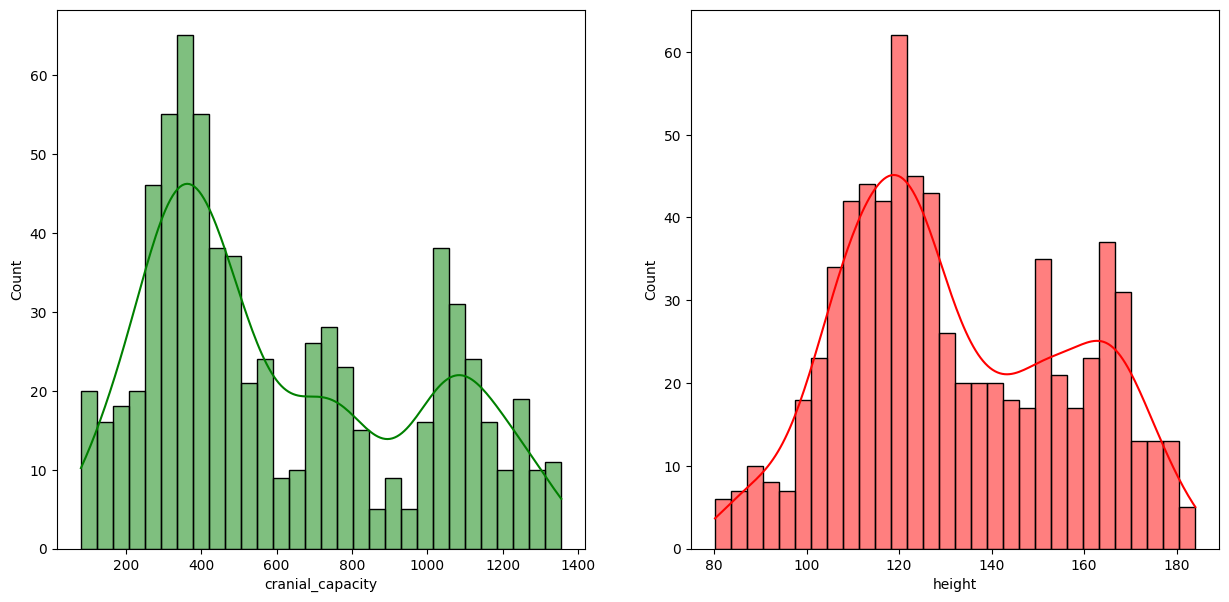

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='cranial_capacity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='height',bins=30,kde=True,color='r')
plt.subplot(122)


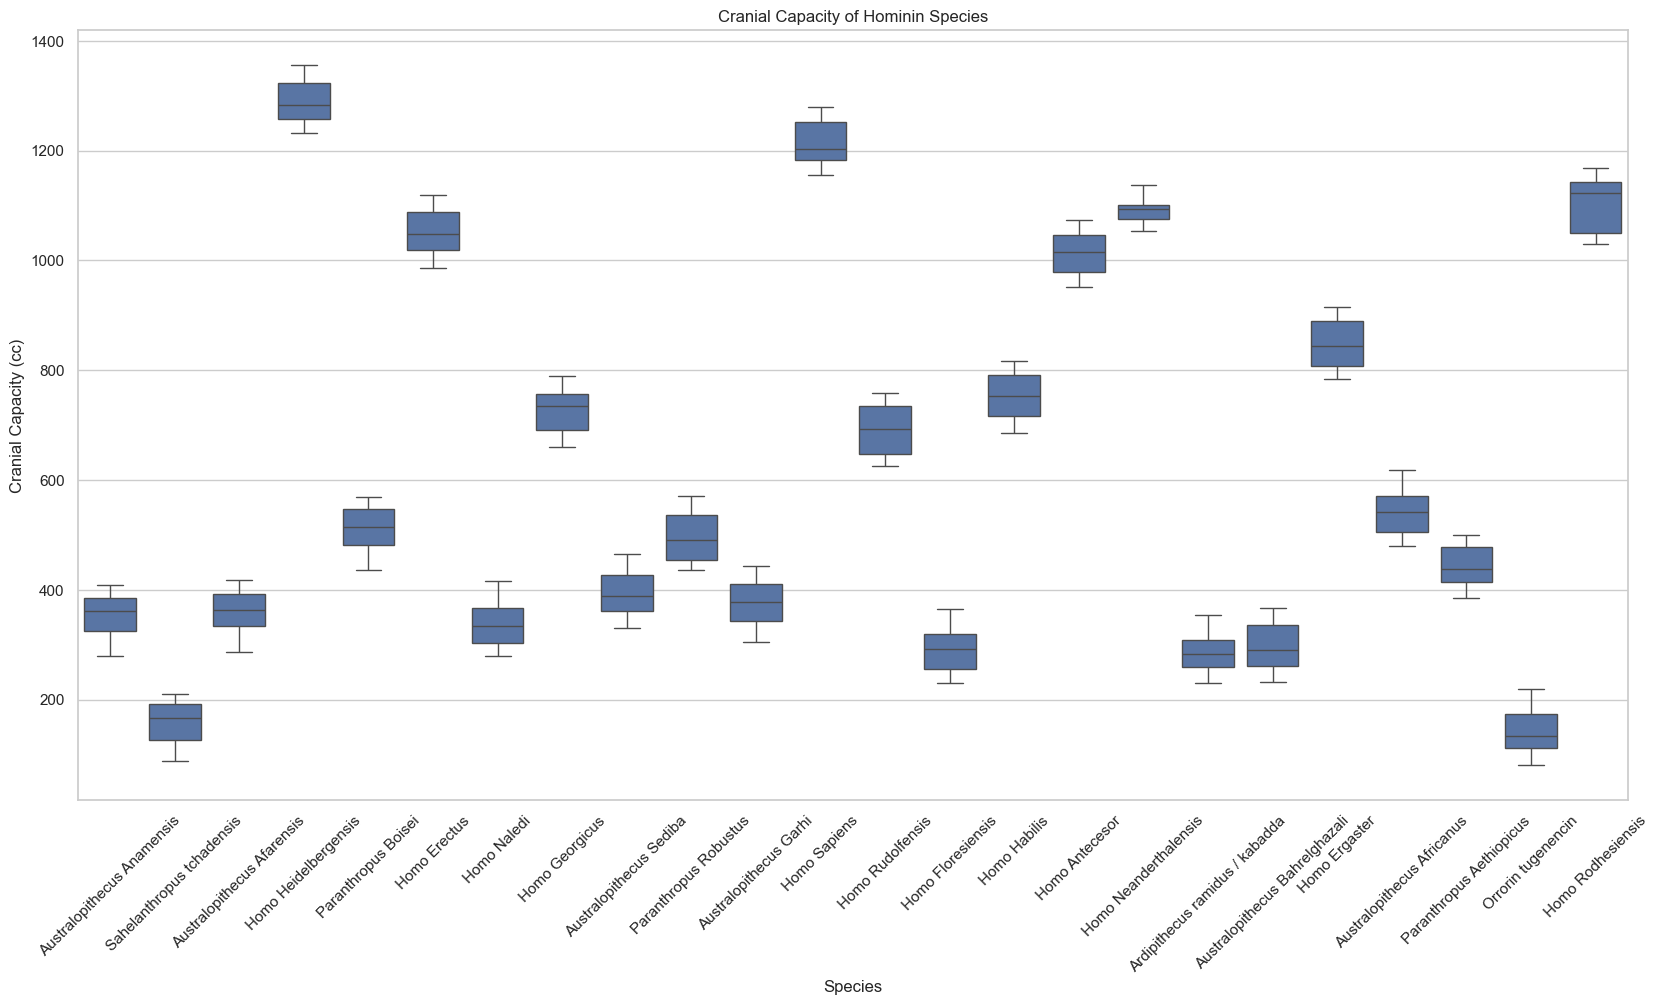

In [20]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x='genus_species', y='cranial_capacity', data=df)

plt.title('Cranial Capacity of Hominin Species')
plt.xlabel('Species')
plt.ylabel('Cranial Capacity (cc)')
plt.xticks(rotation=45)

plt.show()

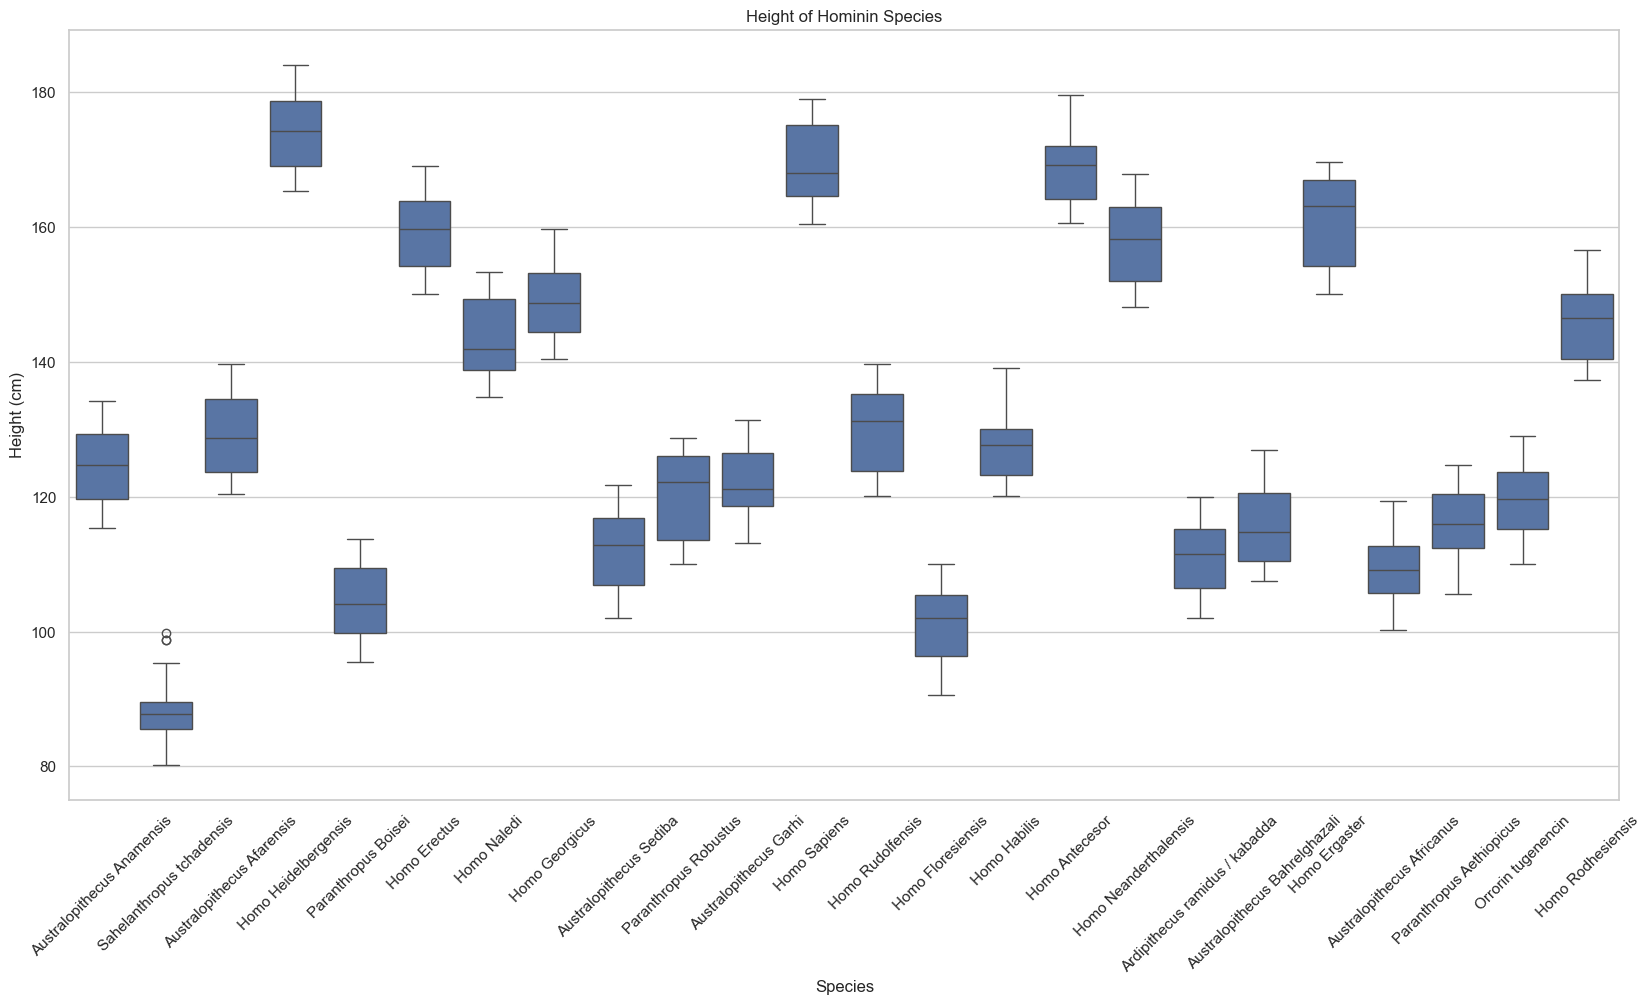

In [21]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x='genus_species', y='height', data=df)

plt.title('Height of Hominin Species')
plt.xlabel('Species')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)

plt.show()

In [22]:
df.head()

,genus_species,time,location,zone,current_country,habitat,cranial_capacity,height,incisor_size,jaw_shape,...,biped,arms,foots,diet,sexual_dimorphism,hip,vertical_front,anatomy,migrated,skeleton
0,Australopithecus Anamensis,4.2- 3.9,Africa,oriental,Kenya,forest-gallery,281.19,132.33,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
1,Sahelanthropus tchadensis,7,Africa,central,Republic of Chad,mixed,94.12,87.49,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
2,Australopithecus Afarensis,3.9 - 2.9,Africa,oriental,Kenya,mixed,311.48,120.44,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Sahelanthropus tchadensis,7,Africa,central,Republic of Chad,mixed,196.00,88.40,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
4,Homo Heidelbergensis,500-250,Europa,central-europe,Germany,cold forest,1232.46,167.60,small,modern,...,modern,manipulate,walk,carnivorous,medium-high,very modern,modern,very modern,no,robust


In [23]:
for column in df.columns:
    if column not in ['cranial_capacity', 'height']:
        print(f"Categories in '{column}' variable:", end=" ")
        print(df[column].unique())
        print('='*100)
        print('\n')

Categories in 'genus_species' variable: ['Australopithecus Anamensis' 'Sahelanthropus tchadensis'
 'Australopithecus Afarensis' 'Homo Heidelbergensis' 'Paranthropus Boisei'
 'Homo Erectus' 'Homo Naledi' 'Homo Georgicus' 'Australopithecus Sediba'
 'Paranthropus Robustus' 'Australopithecus Garhi' 'Homo Sapiens'
 'Homo Rudolfensis' 'Homo Floresiensis' 'Homo Habilis' 'Homo Antecesor'
 'Homo Neanderthalensis' 'Ardipithecus ramidus / kabadda'
 'Australopithecus Bahrelghazali' 'Homo Ergaster'
 'Australopithecus Africanus' 'Paranthropus Aethiopicus'
 'Orrorin tugenencin' 'Homo Rodhesiensis']


Categories in 'time' variable: ['4.2- 3.9 ' '7' '3.9 - 2.9 ' '500-250' '2.3-1.2 ' '1.3-1.1 ' '300-225'
 '1.8' '1.9' '1.9-1 ' '2.5' '300-3' '2.8-1.9 ' '100-50' '2.5-1.6 '
 '1ma-800' '230-40' '4' '3.5- 3 ' '1.8-1.4 ' '3.5-2.4 ' '2.6' '6'
 '600-125']


Categories in 'location' variable: ['Africa' 'Europa' 'Asia ']


Categories in 'zone' variable: ['oriental' 'central' 'central-europe' 'easter-Asia' 'south' 

In [24]:
df.columns

Index(['genus_species', 'time', 'location', 'zone', 'current_country',
       'habitat', 'cranial_capacity', 'height', 'incisor_size', 'jaw_shape',
       'torus_supraorbital', 'prognathism', 'foramen_mágnum_position',
       'canine_size', 'canines_shape', 'tooth_enamel', 'tecno', 'tecno_type',
       'biped', 'arms', 'foots', 'diet', 'sexual_dimorphism', 'hip',
       'vertical_front', 'anatomy', 'migrated', 'skeleton'],
      dtype='object')

In [25]:
df = df[['genus_species', 'cranial_capacity', 'height','current_country','habitat',  'jaw_shape','prognathism','biped', 'arms', 'foots', 'sexual_dimorphism', 'hip','skeleton']]
       
        

In [33]:
df.columns

Index(['genus_species', 'current_country', 'habitat', 'cranial_capacity',
       'height', 'jaw_shape', 'prognathism', 'biped', 'arms', 'foots',
       'sexual_dimorphism', 'hip', 'skeleton'],
      dtype='object')

In [32]:
# categorical_features_ordinal = ['incisor_size', 'torus_supraorbital','prognathism','canine_size','tooth_enamel','tecno','tecno_type','biped','arms','sexual_dimorphism','vertical_front','anatomy','migrated','skeleton']
# for column in df.columns:
#     if column in categorical_features_ordinal:
#         print(f"Categories in '{column}' variable:", end=" ")
#         print(df[column].unique())
#         print('='*100)
#         print('\n')

Categories in 'prognathism' variable: ['high' 'reduced' 'very high' 'medium-high' 'medium' 'absent'
 'very reduced']


Categories in 'biped' variable: ['yes' 'low probability' 'modern' 'high probability']


Categories in 'arms' variable: ['climbing' 'manipulate' 'manipulate with precision']


Categories in 'sexual_dimorphism' variable: ['high' 'medium-high' 'reduced']


Categories in 'skeleton' variable: ['light' 'refined' 'robust']




In [27]:

X = df.drop(columns=['genus_species'],axis=1)
y = df['genus_species']

categorical_features_one_hot = ['current_country','habitat',  'jaw_shape','prognathism','biped', 'arms', 'foots', 'sexual_dimorphism', 'hip','skeleton']
numeric_features = ['cranial_capacity', 'height']  



categorical_transformer_one_hot = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat_one_hot', categorical_transformer_one_hot, categorical_features_one_hot),
        ('num', numeric_transformer, numeric_features)
    ])

X = preprocessor.fit_transform(X)

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


logreg = LogisticRegression(random_state=42, solver='liblinear') 

param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2']}

grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=KFold(n_splits=5), scoring='accuracy')

grid_logreg.fit(X_train, y_train)

y_pred_logreg_train = grid_logreg.predict(X_train)
y_pred_logreg_test = grid_logreg.predict(X_test)

print("Train Classification Report:")
print(classification_report(y_train, y_pred_logreg_train))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg_test))




Train Classification Report:
                                precision    recall  f1-score   support

Ardipithecus ramidus / kabadda       1.00      1.00      1.00        21
    Australopithecus Afarensis       1.00      1.00      1.00        23
    Australopithecus Africanus       1.00      1.00      1.00        25
    Australopithecus Anamensis       1.00      1.00      1.00        23
Australopithecus Bahrelghazali       1.00      1.00      1.00        25
        Australopithecus Garhi       1.00      1.00      1.00        26
       Australopithecus Sediba       1.00      1.00      1.00        26
                Homo Antecesor       1.00      1.00      1.00        23
                  Homo Erectus       1.00      1.00      1.00        23
                 Homo Ergaster       1.00      1.00      1.00        24
             Homo Floresiensis       1.00      1.00      1.00        24
                Homo Georgicus       1.00      1.00      1.00        26
                  Homo Habilis    

In [31]:
import pickle

# Save the preprocessor
with open('../artifacts/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
    
# Save the best estimator (trained model)
with open('../artifacts/best_logistic_model.pkl', 'wb') as f:
    pickle.dump(grid_logreg.best_estimator_, f)